In [1]:
from load_data import load_data
import utilities


Using TensorFlow backend.


In [2]:
from Graph_generator import Graph_Generator
from embedder import Transformer
from embedder import Transformer_GNN
from embedder import Embedder
from sklearn.model_selection import train_test_split
import numpy as np

from keras.utils import plot_model
from keras import losses
from keras.optimizers import RMSprop


from spektral.layers import GraphAttention, GlobalAttentionPool
from spektral.utils import localpooling_filter
from keras.layers import Input, Dense, Reshape, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2





n_graphs = 1000

# 20 permutations
gg = Graph_Generator(n_graphs=n_graphs,
                     degree = 5)
g1, na1, ea1 = gg.generate(20,10,10,1)
g2, na2, ea2 = gg.generate(20,10,10,10)

graphs, labels = gg.generate_set(g1,g2,na1, ea1,na2, ea2,13,13,plot=False)



functions = [utilities.degree,utilities.clust_coefficient,utilities.local_degree_profile]
graphs = utilities.add_info_to_nodes(graphs,functions)


max_n_nodes, n_attributes = utilities.find_shapes(graphs)
n_classes = len(np.unique(labels))


graphs_train, graphs_test, labels_train, labels_test = train_test_split(graphs,labels, test_size=0.3, random_state=42)


In [5]:
from sklearn.decomposition import TruncatedSVD

times = 1
dim = [2]

##### GNN 2
my_GNN_3 = generate_GNN(max_n_nodes,n_attributes,n_classes,
                       batch_size=32,
                       validation_split=0.2,
                       epochs=500)


m_3 = Transformer(my_GNN_3)
m_4 = Transformer(TruncatedSVD())
emb_3 = Embedder([m_3,m_4], name="Spektral 500 epochs + pca")

emb = [emb_3]
print("done")

done


In [6]:
vis = utilities.repeat_n_times(graphs_train, labels_train, emb, dim, 1,test_size=0.3,seed = 11)

	 iteration n: 1
	 	 dim:  2
	 	 	  Spektral 500 epochs + pca
epochs GNN
122


In [7]:
vis.summary()

                               2    STD    mean
-------------------------  -----  -----  ------
Spektral 500 epochs + pca  0.876  0.099   0.488


In [8]:
# transformo graph_train usando spektral
encoded_128 = m_3.transform(graphs_train)


In [9]:
####### scale between -1 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(-0.5, 0.5))
scaler.fit(encoded_128)
encoded_128_norm = scaler.transform(encoded_128)


In [17]:
from keras.utils import plot_model
from keras import losses
from keras.optimizers import RMSprop
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np



def tmp_auto(stddev):
    
    iniz = RandomNormal(mean=0.0, stddev=stddev)

    X_in = Input(shape=(128,))
    dense_64 = Dense(64, activation='relu',kernel_initializer=iniz)(X_in)
    dense_16 = Dense(16, activation='relu',kernel_initializer=iniz)(dense_64)
    dense_4 = Dense(8, activation='relu',kernel_initializer=iniz)(dense_16)

    dense_2 = Dense(2, activation='softmax',kernel_initializer=iniz)(dense_4)

    dense_4_2 = Dense(8, activation='relu',kernel_initializer=iniz)(dense_2)
    dense_16_2 = Dense(16, activation='relu',kernel_initializer=iniz)(dense_4_2)
    dense_64_2 = Dense(64, activation='relu',kernel_initializer=iniz)(dense_16_2)
    out = Dense(128,  activation='relu',kernel_initializer=iniz)(dense_64_2)

    model = Model(inputs=X_in, outputs=out)
    model.compile(optimizer=RMSprop(), loss=losses.mean_squared_error)
    
    return(model)
    
def tmp_plot(model_history):
    
    loss = model_history.history['loss']

    val_loss = model_history.history['val_loss']

    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    print(np.max(loss))
    print(np.min(loss))

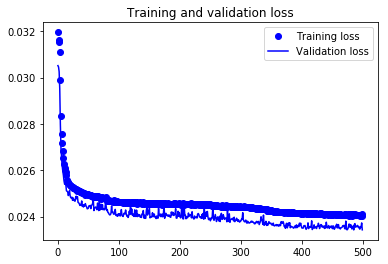

0.03195820546575955
0.024036315296377453


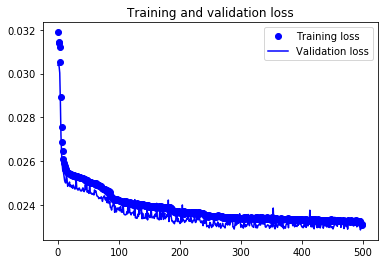

0.03189167816724096
0.023101475462317465


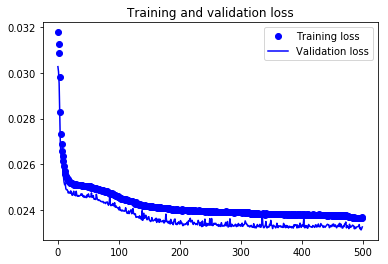

0.031784611301762716
0.02362566121986934


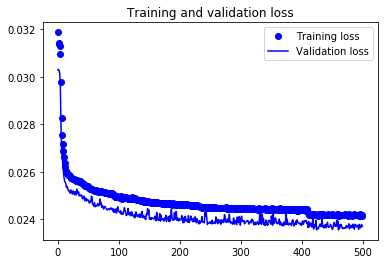

0.03187747267740113
0.024118123842137202


In [23]:
from keras.utils import plot_model
from keras import losses
from keras.optimizers import RMSprop
from keras.initializers import RandomNormal


model = tmp_auto(0.1)
model_history = model.fit(encoded_128_norm,encoded_128_norm,
                batch_size=32,
                validation_split=0.2,
                epochs=500,
                verbose=False)
tmp_plot(model_history)

model = tmp_auto(0.09)
model_history = model.fit(encoded_128_norm,encoded_128_norm,
                batch_size=32,
                validation_split=0.2,
                epochs=500,
                verbose=False)
tmp_plot(model_history)


model = tmp_auto(0.1)
model_history = model.fit(encoded_128_norm,encoded_128_norm,
                batch_size=32,
                validation_split=0.2,
                epochs=500,
                verbose=False)
tmp_plot(model_history)

model = tmp_auto(0.09)
model_history = model.fit(encoded_128_norm,encoded_128_norm,
                batch_size=32,
                validation_split=0.2,
                epochs=500,
                verbose=False)
tmp_plot(model_history)

In [287]:
encoded_128_test = m_3.transform(graphs_test)
len(encoded_128_test)

####### scale between -1 and 1
encoded_128_test_norm = scaler.transform(encoded_128_test)


[[0.24114841 0.7588516 ]
 [0.31262392 0.6873761 ]
 [0.30888796 0.69111204]
 [0.29655164 0.7034484 ]
 [0.8591416  0.14085843]
 [0.05620674 0.94379324]
 [0.3229841  0.67701596]
 [0.3809553  0.6190447 ]
 [0.42666903 0.57333094]
 [0.76191163 0.23808841]]


(0.035666086, 0.9817386)

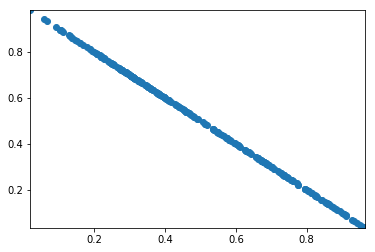

In [288]:
X_in_dec = Input(shape=(128,))

dense_64_dec = Dense(64, activation='relu')(X_in_dec)
dense_16_dec = Dense(16, activation='relu')(dense_64_dec)
dense_4_dec = Dense(4, activation='relu')(dense_16_dec)

dense_2_dec = Dense(2, activation='softmax')(dense_4_dec)
#dense_2_dec = Dense(2, activation='relu')(X_in_dec)


model_dec = Model(inputs=[X_in_dec], outputs=dense_2_dec)
model_dec.compile(optimizer=RMSprop(), loss=losses.mean_squared_error)

model_dec.set_weights(model.get_weights())


res = model_dec.predict(encoded_128_test_norm)
print(res[0:10])

plt.scatter(res[:,0],res[:,1])
plt.xlim(np.min(res[:,0]),np.max(res[:,0]))
plt.ylim(np.min(res[:,1]),np.max(res[:,1]))

In [290]:
from sklearn.neighbors import KNeighborsClassifier
from evaluator import Evaluator
from visualizator import Visualizator

viss = Visualizator([2],1,["spektral 100 epoch + auto"])


evaluator = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = evaluator.performance_with_kfold(res,labels_test)


viss.add_metrics(acc,pre,rec,f,0,0)

viss.summary()
vis.summary()

                               2    STD    mean
-------------------------  -----  -----  ------
spektral 100 epoch + auto  0.793   0.07   0.432
                               2    STD    mean
-------------------------  -----  -----  ------
Spektral 100 epochs + pca  0.753  0.081   0.417


In [258]:
'''
                             2    STD    mean
-------------------------  ---  -----  ------
spektral 100 epoch + auto  0.8  0.067   0.434
                               2    STD    mean
-------------------------  -----  -----  ------
Spektral 100 epochs + pca  0.771  0.084   0.428
'''




from sklearn.neighbors import KNeighborsClassifier
from evaluator import Evaluator
from visualizator import Visualizator

viss = Visualizator([2],1,["spektral 100 epoch + auto"])


evaluator = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = evaluator.performance_with_kfold(res,labels_test)


viss.add_metrics(acc,pre,rec,f,0,0)

viss.summary()
vis.summary()

                              2    STD    mean
-------------------------  ----  -----  ------
spektral 100 epoch + auto  0.62  0.079    0.35
                              2    STD    mean
-------------------------  ----  -----  ------
Spektral 100 epochs + pca  0.64  0.082   0.361


In [4]:
from embedder import Transformer_GNN
def generate_GNN(max_n_nodes,n_attributes,n_classes,batch_size = 32,validation_split = 0.1,epochs = 100,verbose=0):
    

    learning_rate = 0.001
    l2_reg = 5e-4  

    ##### DEFINISCI MODELLO ORIGINALE
    X_in_1_1 = Input(shape=(max_n_nodes, n_attributes))
    filter_in_1_1 = Input((max_n_nodes, max_n_nodes))
    gc1_1_1 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([X_in_1_1, filter_in_1_1])
    gc2_1_1 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([gc1_1_1, filter_in_1_1])
    pool_1_1 = GlobalAttentionPool(128)(gc2_1_1)
    output_1_1 = Dense(n_classes, activation='softmax')(pool_1_1)
    model_1_1 = Model(inputs=[X_in_1_1, filter_in_1_1], outputs=output_1_1)
    optimizer = Adam(lr=learning_rate)
    model_1_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])


    ##### CREA IL SECONDO MODELLO
    X_in_1_2 = Input(shape=(max_n_nodes, n_attributes))
    filter_in_1_2 = Input((max_n_nodes, max_n_nodes))
    gc1_1_2 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([X_in_1_2, filter_in_1_2])
    gc2_1_2 = GraphAttention(32, activation='relu', kernel_regularizer=l2(l2_reg))([gc1_1_2, filter_in_1_2])
    pool_1_2 = GlobalAttentionPool(128)(gc2_1_2)
    model_1_2 = Model(inputs=[X_in_1_2, filter_in_1_2], outputs=pool_1_2)
    model_1_2.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['acc'])


    my_GNN_1 = Transformer_GNN(original_model = model_1_1,
                                      new_model = model_1_2,
                                      batch_size = batch_size,
                                      validation_split = validation_split,
                                      epochs = epochs,
                                      verbose=verbose)
    
    
    return(my_GNN_1)

